In [1]:
#Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

## Data Loading

In [2]:
df = pd.read_csv(r"D:/Code/Mentorship AI/Basic Machine Learning/FinalProject/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Data Preprocessing

In [3]:
df = df.drop("Unnamed: 32",axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

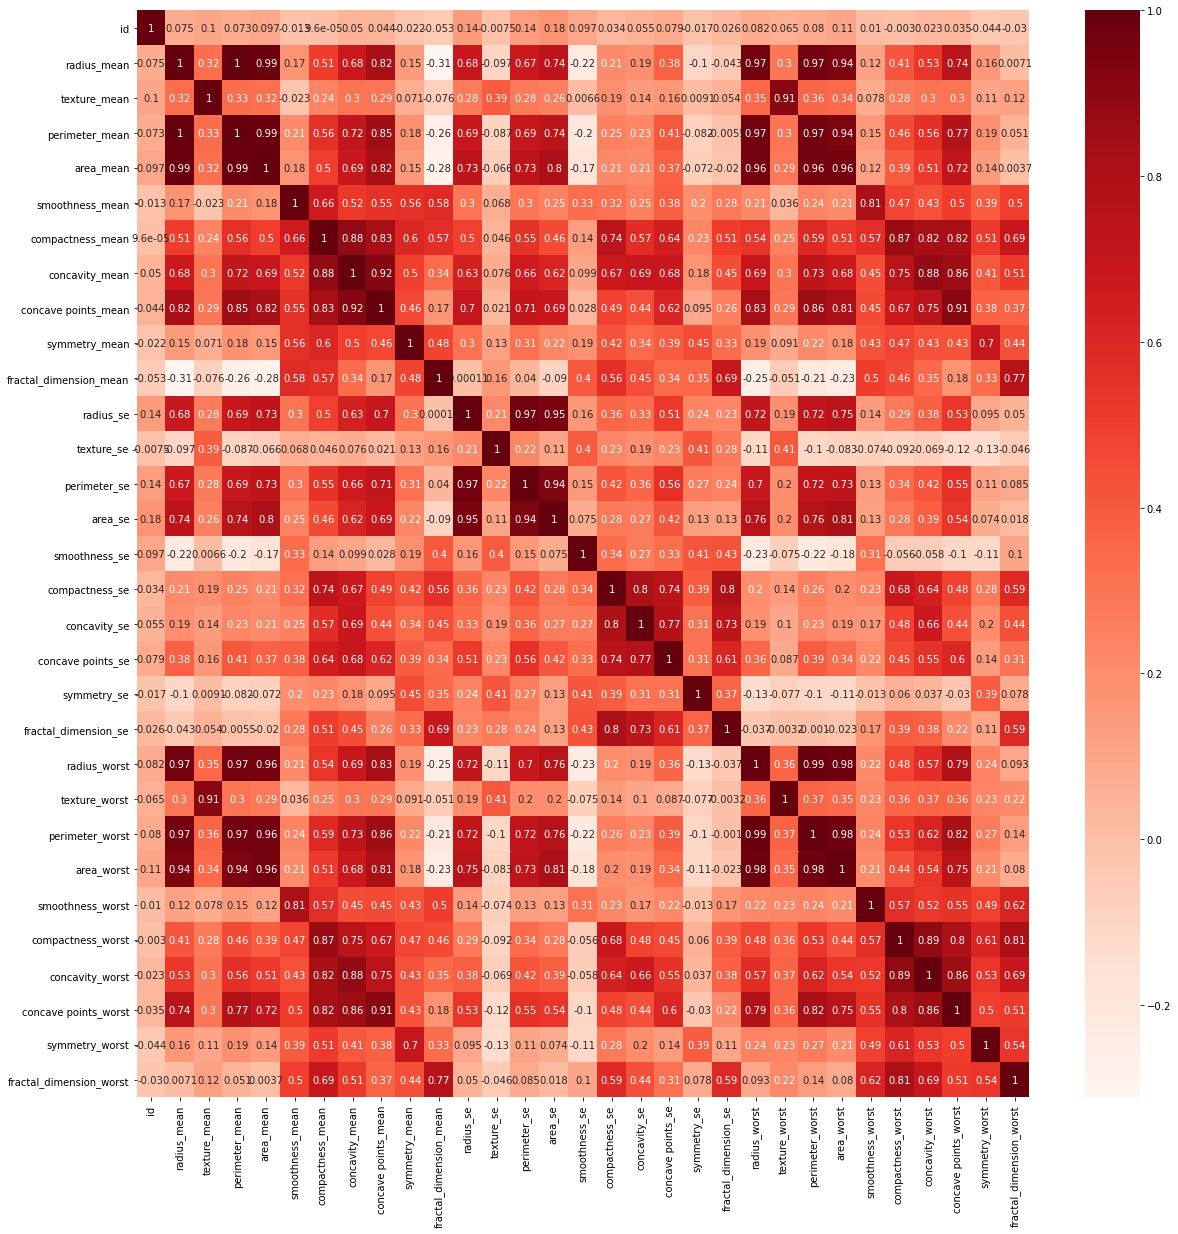

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds,ax=ax)

# Data Filtering & Splitting

In [7]:
y = df.iloc[:, 1]
X = df.iloc[:, 2:32]

In [8]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [9]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [10]:
print('Jumlah data training :', X_train.shape[0])
print('Jumlah data testing :', X_test.shape[0])

Jumlah data training : 455
Jumlah data testing : 114


# Normalisasi Data

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)

# Data Modeling

### SVM

In [12]:
from sklearn import svm
svm1 = svm.SVC(kernel ='linear', C = 0.01)

svm1.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [13]:
y_pred = svm1.predict(X_test)

In [14]:
print("Akurasi :", svm1.score(X_test, y_test))

Akurasi : 0.9473684210526315


In [15]:
print("F1 Score :", f1_score(y_test, y_pred, average = 'macro'))

F1 Score : 0.9449275362318841


In [16]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix: \n')
print(cm)

print('\nAccuracy: ', accuracy_score(y_test, y_pred))
print('Precission: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))

Confusion Matrix: 

[[66  0]
 [ 6 42]]

Accuracy:  0.9473684210526315
Precission:  0.9583333333333333
Recall:  0.9375
f1_score:  0.9449275362318841


## Using GridSearh CV mencari best params SVM

In [17]:
from sklearn.model_selection import GridSearchCV #mencari parameter optimal
from sklearn.metrics import make_scorer #mencari make score

svm_tune = svm.SVC()
scorer = make_scorer(accuracy_score, greater_is_better = True)
parameters = {
    'C' : [0, 0.001, 0.01, 0.1, 0,5],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.5, 1, 1.1]
}

#svm_grid = GridSearchCV(svm1, parameters, n_jobs = 1, cv = 5)
svm_grid = GridSearchCV(svm_tune, param_grid = parameters, scoring = scorer, cv = 5)
svm_grid.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.001, 0.01, 0.1, 0, 5],
                         'gamma': [0.1, 0.5, 1, 1.1],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(accuracy_score))

In [18]:
print('Best Parameter :', svm_grid.best_params_)
print('Best Score     :', svm_grid.best_score_)

Best Parameter : {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score     : 0.9780219780219781


In [19]:
svm2 = svm.SVC(C = 0.1, gamma = 0.1, kernel = 'linear')

svm2.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [20]:
y_pred5 = svm2.predict(X_test)

cm = confusion_matrix(y_test, y_pred5)

print('Confusion Matrix: \n')
print(cm)

print('\nAccuracy: ', accuracy_score(y_test, y_pred5))
print('Precission: ', precision_score(y_test, y_pred5, average='macro'))
print('Recall: ', recall_score(y_test, y_pred5, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred5, average='macro'))

Confusion Matrix: 

[[66  0]
 [ 5 43]]

Accuracy:  0.956140350877193
Precission:  0.9647887323943662
Recall:  0.9479166666666667
f1_score:  0.9542792973449907


### KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y.ravel(), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87719298 0.94736842 0.96491228 0.96491228 0.87719298 0.87719298
 0.92982456 0.87719298 0.98245614 0.92857143]


In [22]:
# kNN Score
round(np.mean(score)*100, 2)

92.27

In [23]:
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, y_pred2)

print('Confusion Matrix: \n')
print(cm)

print('\nAccuracy: ', accuracy_score(y_test, y_pred2))
print('Precission: ', precision_score(y_test, y_pred2, average='macro'))
print('Recall: ', recall_score(y_test, y_pred2, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred2, average='macro'))

Confusion Matrix: 

[[66  0]
 [ 5 43]]

Accuracy:  0.956140350877193
Precission:  0.9647887323943662
Recall:  0.9479166666666667
f1_score:  0.9542792973449907


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y.ravel(), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.89473684 0.9122807  0.89473684 1.         0.89473684 0.9122807
 0.92982456 0.89473684 0.96491228 0.94642857]


In [26]:
# decision tree Score
round(np.mean(score)*100, 2)

92.45

In [27]:
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred3)

print('Confusion Matrix: \n')
print(cm)

print('\nAccuracy: ', accuracy_score(y_test, y_pred3))
print('Precission: ', precision_score(y_test, y_pred3, average='macro'))
print('Recall: ', recall_score(y_test, y_pred3, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred3, average='macro'))

Confusion Matrix: 

[[64  2]
 [ 6 42]]

Accuracy:  0.9298245614035088
Precission:  0.9344155844155844
Recall:  0.9223484848484849
f1_score:  0.9271099744245525


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y.ravel(), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.94736842 0.96491228 0.94736842 0.96491228 0.94736842 0.89473684
 0.98245614 0.94736842 0.96491228 0.98214286]


In [30]:
# Random Forest Score
round(np.mean(score)*100, 2)

95.44

In [31]:
clf.fit(X_train, y_train)
y_pred4 = clf.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_pred4)

print('Confusion Matrix: \n')
print(cm)

print('\nAccuracy: ', accuracy_score(y_test, y_pred4))
print('Precission: ', precision_score(y_test, y_pred4, average='macro'))
print('Recall: ', recall_score(y_test, y_pred4, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred4, average='macro'))

Confusion Matrix: 

[[64  2]
 [ 6 42]]

Accuracy:  0.9298245614035088
Precission:  0.9344155844155844
Recall:  0.9223484848484849
f1_score:  0.9271099744245525
